### Final Case Analysis
##### December 17th, 2019
##### Professor Mittal
Jacob Mannix



In [948]:
# Libraries

# First time install of libraries
# !pip install textblob
# !pip install vaderSentiment
# !pip install autocorrect
# !pip install umap
# !pip install umap-learn
# !pip install hdbscan

#External Files
import os
import datetime
import time
from prettytable import PrettyTable

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Sentiment
# import re
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Prep for DTM
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize

# DTM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Dimension Reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
# from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
# import umap
import umap.umap_ as umap

# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan


In [2]:
# %cd /Users/jacob/Box Sync/M.S. Analytics/Analytics Fall/DATA 901/Text Mining/Final Case/

C:\Users\jacob\Box Sync\M.S. Analytics\Analytics Fall\DATA 901\Text Mining\Final Case


In [6]:
# # Import dataset
# reviews_all = pd.read_csv("Amazon_reviews.csv", sep=",", names=['Rating', 'Title', 'Review'])
# reviews_sample = reviews_all.sample(n=10000, random_state=1)

In [7]:
# print(reviews_all.shape)
# print(reviews_sample.shape)
# # print(reviews_all.head())
# # print(reviews_sample.head())

In [7]:
# # Create a csv of 5000 reviews
# reviews_sample.to_csv("reviews_sample.csv")

In [8]:
# # Read in the sample reviews csv, Apply column and Index Names, save as new csv
# reviews_renamed = pd.read_csv("reviews_sample.csv", header=0, names=['Index','Rating', 'Title', 'Review']) 
# reviews_renamed = reviews_renamed.set_index(reviews_renamed.columns[0])
# reviews_renamed.to_csv("reviews.csv")

In [3]:
# Reading reviews.csv containing sample of reviews from full dataset
reviews = pd.read_csv("reviews.csv", header=0, index_col=['Index'])

In [4]:
print(reviews.shape)
# print(reviews.head())

(10000, 3)


In [5]:
# Converting Reviews dataframe column to list
reviews_list = reviews['Review'].values.tolist()

In [15]:
# reviews_list

#### Sentiment Analysis
##### Textblob and Vader

##### Textblob

In [168]:
# Storing polarity and subjectivity in lists
polarity = []
subj = []
for i in reviews_list:
    test = TextBlob(i) 
    obj = test.sentiment
    polarity.append(obj[0])
    subj.append(obj[1])

# print(polarity)
# print(subj)

In [199]:
# textblob_lists = [polarity, subj]
# textblob_polarity = pd.DataFrame(polarity).melt()
# textblob_subj = pd.DataFrame(subj).melt()

# textblob_polarity = textblob_polarity.rename(columns={"value": "TextBlobPolarity"})
# textblob_subj = textblob_subj.rename(columns={"value": "TextBlobSubj"})

##### VADER: Valence Aware Dictionary for sEntiment Reasoning

In [177]:
neg = []
neu = []
pos = []
compound = []

for i in reviews_list:
    test = SentimentIntensityAnalyzer().polarity_scores(i)
    neg.append(test['neg'])
    neu.append(test['neu'])
    pos.append(test['pos'])
    compound.append(test['compound'])

# print(neg)
# print(pos)

[0.155, 0.08, 0.0, 0.069, 0.0, 0.112, 0.012, 0.0, 0.044, 0.057, 0.056, 0.0, 0.047, 0.037, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.035, 0.134, 0.091, 0.239, 0.2, 0.237, 0.189, 0.0, 0.179, 0.072, 0.186, 0.04, 0.053, 0.0, 0.035, 0.038, 0.0, 0.072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.04, 0.079, 0.129, 0.108, 0.213, 0.0, 0.136, 0.141, 0.065, 0.092, 0.067, 0.051, 0.0, 0.096, 0.059, 0.041, 0.113, 0.126, 0.068, 0.014, 0.142, 0.0, 0.042, 0.04, 0.0, 0.057, 0.0, 0.0, 0.054, 0.096, 0.0, 0.328, 0.02, 0.128, 0.036, 0.073, 0.026, 0.146, 0.081, 0.0, 0.0, 0.123, 0.034, 0.078, 0.0, 0.051, 0.069, 0.042, 0.076, 0.0, 0.0, 0.075, 0.27, 0.139, 0.159, 0.107, 0.14, 0.0, 0.078, 0.241, 0.154, 0.0, 0.154, 0.034, 0.145, 0.091, 0.196, 0.139, 0.0, 0.075, 0.079, 0.164, 0.0, 0.045, 0.17, 0.0, 0.054, 0.057, 0.08, 0.026, 0.051, 0.141, 0.085, 0.0, 0.051, 0.0, 0.0, 0.024, 0.027, 0.0, 0.067, 0.086, 0.054, 0.0, 0.049, 0.0, 0.06, 0.0, 0.092, 0.187, 0.0, 0.0, 0.06, 0.019, 0.119, 0.049, 0.15, 0.0, 0.071, 0.106, 0.022, 0.0, 0.161, 0

In [224]:
# Create a DataFrame of Polarity scores and features from TextBlob and Vader
polaritydf = pd.DataFrame()

# TextBlob
polaritydf['TextBlobPolarity'] = polarity
polaritydf['TextBlobSubj'] = subj

# Vader
polaritydf['VaderNeg']= neg
polaritydf['VaderNeu']= neu
polaritydf['VaderPos']= pos
polaritydf['VaderCompound']= compound

In [226]:
# polaritydf

In [227]:
# Save Polarity Features as csv for future use
# polaritydf.to_csv("polarity.csv")

In [559]:
polaritydf = pd.read_csv("polarity.csv").drop(['Unnamed: 0'], axis=1)
review_ratingdf = pd.read_csv("reviews.csv", usecols=['Rating'])

In [560]:
analyzerdf = pd.DataFrame()
analyzer_list = [polaritydf, review_ratingdf]

analyzerdf = pd.concat(analyzer_list, axis=1)

In [575]:
# analyzerdf.head()

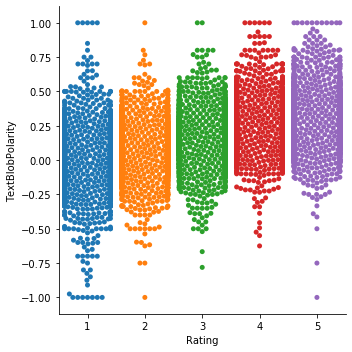

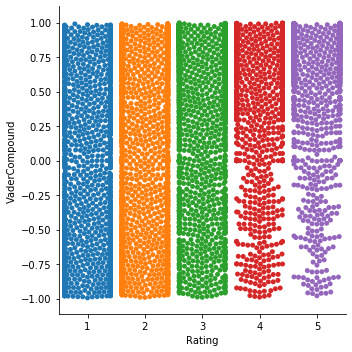

In [570]:
sns.catplot(x="Rating", y="TextBlobPolarity", kind="swarm", data=analyzerdf)
sns.catplot(x="Rating", y="VaderCompound", kind="swarm", data=analyzerdf)

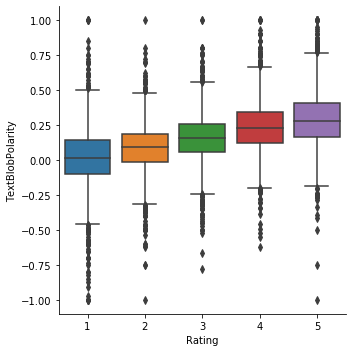

In [574]:
# Box plot Rating vs. Textblob
sns.catplot(x="Rating", y="TextBlobPolarity", kind="box", data=analyzerdf);

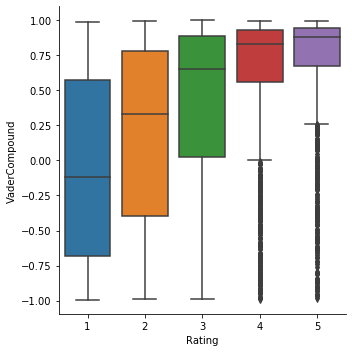

In [563]:
# Box plot Rating vs. Vader
sns.catplot(x="Rating", y="VaderCompound", kind="box", data=analyzerdf);

#### Preparing Dataset for DTM
- Convert Reviews to List
- stemming, lemmatization and stop_words

In [12]:
# Stop words
en_stop = stopwords.words('english')

# # Additions to the stop word list
en_stop.extend([".","-","(", ")","/", ",", "’", "”","“", '!', '#', '$', '%', '&', ' "','"',"'", "'d", 
                "'ll", "'m", "'re", "'s", "'the", "'ve",'--', "..", "...", ".i", ".it", ".the", ".thi",
                '0', '1', '1.', '1/2', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '1970', 
                '1980', '1st', '2', '2.', '200', '2000', '2002', '2004', '24', '25', '2nd', '3', '30', '300', 
                '32', '3rd', '4', '40', '45', '48', '4th', '5', '5.1', '20', '50', '500', '5th', '6', '60', '7', 
                '70', '8', '80', '9', '90', ':', ';', '=', '>', '?', '@', '[', ']', '20', '50', '`', '``', "''"])

#### DTM
###### Frequency Distribution + TFIDF weights

In [46]:
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

# tokenize stems and tokenizes altogether
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

##### DTM using Frequency Distribution: CountVectorizer

In [603]:
vect = CountVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,1),max_features = 3000) # ngram 1-2
# print(vect.fit(reviews_list))
dtmCount = vect.fit_transform(reviews_list)

In [610]:
# Most Deterministic Tokens
# converting dtm to array to view
# see what tokens are most deterministic of rating
# dtmCount.toarray()

dtmTokensdf = pd.DataFrame(dtmCount.toarray(), columns=vect.get_feature_names())
# df2.head()

# df2.iloc[1:10, 1:40]

In [611]:
determTokens = pd.DataFrame()
determToken_list = [review_ratingdf, dtmTokensdf]

determTokens = pd.concat(determToken_list, axis=1)

In [633]:
determTokenspivot = determTokens.pivot_table(index=['Rating'])

In [678]:
# determTokenspivot.idxmax(axis=1)

In [738]:
determTokens_list = determTokenspivot.apply(lambda s: s.abs().nlargest(50).index.tolist(), axis=1)

In [752]:
l1 = [x for x in determTokens_list[1] if x not in determTokens_list[3]]
l11 = [x for x in l1 if x not in determTokens_list[4]]
l12 = [x for x in l11 if x not in determTokens_list[5]]
determTokens_Rating1 = [x for x in l12 if x not in determTokens_list[5]]

In [779]:
# determTokens_Rating5

In [760]:
# Duplicate Words Removed
print("1",determTokens_Rating1)
print("2",determTokens_Rating2)
print("3",determTokens_Rating3)
print("4",determTokens_Rating4)
print("5",determTokens_Rating5)

1 ['money', 'tri', 'bad', 'wast', 'review', 'back', 'got', 'never', 'know', 'purchas', 'peopl']
2 ['tri', 'disappoint', 'product', 'two', 'end', 'seem', 'charact', 'say', 'got']
3 ['littl', 'still', 'lot', 'howev', 'seem', 'interest', 'end', 'charact']
4 ['littl', 'song', 'also', 'enjoy', 'still', 'album', 'music', 'recommend', 'best', 'see', 'give', 'lot']
5 ['best', 'recommend', 'music', 'easi', 'find', 'new', 'life', 'mani', 'everi']


In [757]:
# Without duplicates removed
# print("1:", determTokens_list[1][:])
# print("2:", determTokens_list[2][:])
# print("3:", determTokens_list[3][:])
# print("4:", determTokens_list[4][:])
# print("5:", determTokens_list[5][:])

In [1050]:
dT = PrettyTable()
dT.field_names = ["Rating", "Words in order"]
dT.add_row(["Rating 1", ['money', 'tri', 'bad', 'wast', 'review', 'back', 'got', 'never', 'know', 'purchas', 'peopl']])
dT.add_row(["Rating 2", ['tri', 'disappoint', 'product', 'two', 'end', 'seem', 'charact', 'say', 'got']])
dT.add_row(["Rating 3", ['littl', 'still', 'lot', 'howev', 'seem', 'interest', 'end', 'charact']])
dT.add_row(["Rating 4", ['littl', 'song', 'also', 'enjoy', 'still', 'album', 'music', 'recommend', 'best', 'see', 'give', 'lot']])
dT.add_row(["Rating 5", ['best', 'recommend', 'music', 'easi', 'find', 'new', 'life', 'mani', 'everi']])

In [1051]:
dT1 = PrettyTable()
dT1.field_names = ["Rating", "Word 1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
dT1.add_row(["Rating 1", 'money', 'tri', 'bad', 'wast', 'review', 'back', 'got', 'never', 'know', 'purchas', 'peopl', ''])
dT1.add_row(["Rating 2", 'tri', 'disappoint', 'product', 'two', 'end', 'seem', 'charact', 'say', 'got', '', '', ''])
dT1.add_row(["Rating 3", 'littl', 'still', 'lot', 'howev', 'seem', 'interest', 'end', 'charact', '', '', '', ''])
dT1.add_row(["Rating 4", 'littl', 'song', 'also', 'enjoy', 'still', 'album', 'music', 'recommend', 'best', 'see', 'give', 'lot'])
dT1.add_row(["Rating 5", 'best', 'recommend', 'music', 'easi', 'find', 'new', 'life', 'mani', 'everi', '', '', ''])

In [1052]:
# print(dT)
print(dT1)

+----------+--------+------------+---------+-------+--------+----------+---------+-----------+-------+---------+-------+-----+
|  Rating  | Word 1 |     2      |    3    |   4   |   5    |    6     |    7    |     8     |   9   |    10   |   11  |  12 |
+----------+--------+------------+---------+-------+--------+----------+---------+-----------+-------+---------+-------+-----+
| Rating 1 | money  |    tri     |   bad   |  wast | review |   back   |   got   |   never   |  know | purchas | peopl |     |
| Rating 2 |  tri   | disappoint | product |  two  |  end   |   seem   | charact |    say    |  got  |         |       |     |
| Rating 3 | littl  |   still    |   lot   | howev |  seem  | interest |   end   |  charact  |       |         |       |     |
| Rating 4 | littl  |    song    |   also  | enjoy | still  |  album   |  music  | recommend |  best |   see   |  give | lot |
| Rating 5 |  best  | recommend  |  music  |  easi |  find  |   new    |   life  |    mani   | everi |         

In [513]:
# Converting DTM to dense/array, unweighted
dtmCount_dense = dtmCount.todense()
type(dtmCount_dense)
# type(dtmCount)

numpy.matrix

##### DTM using weights: TfidfVectorizer

In [229]:
vect = TfidfVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,1),
                       max_features = 3000, norm='l2', use_idf=True)
# print(vect.fit(reviews_list))
dtmTfidf = vect.fit_transform(reviews_list)

In [798]:
# Converting DTM to array/dense matrix, weighted
dtmTfidf_array = dtmTfidf.toarray()
dtmTfidf_dense = dtmTfidf.todense()

In [231]:
print(type(dtmTfidf))
print(dtmTfidf.shape)
# print(type(dtmTfidf_array))
print(type(dtmTfidf_dense))

<class 'scipy.sparse.csr.csr_matrix'>
(10000, 3000)
<class 'numpy.matrix'>


#### Dimension Reduction
###### PCA, SparsePCA, LLE, UMAP, t-SNE?

##### PCA - Tfidf L2 -- useless, way too many components

In [853]:
pca = PCA(0.90)
pca.fit(dtmTfidf_array)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [854]:
pca_components = pca.fit_transform(dtmTfidf_dense)
pca_components.shape
# pca_components.view()

(10000, 1769)

##### PCA - Frequency -- way too many components

In [232]:
pca = PCA(0.90)
pca.fit(dtmCount_array)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [233]:
pca_components = pca.fit_transform(dtmCount_dense)
pca_components.shape
# pca_components.view()

(10000, 1165)

##### Sparse PCA - Tfidf L2

In [855]:
SparsePCA = SparsePCA(20)
SparsePCA.fit(dtmTfidf_array)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
          n_components=20, n_jobs=None, normalize_components=False,
          random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [856]:
Sparsepca_components = SparsePCA.fit_transform(dtmTfidf_array)
Sparsepca_components.shape
# Sparsepca_components.view()

(10000, 20)

In [857]:
colsSparsePCA = []
for i in range(1,21):
    colsSparsePCA.append("SparsePCA"+str(i))

In [858]:
# Put SparsePCA components in df
SparsePCAdf = pd.DataFrame(Sparsepca_components, columns = colsSparsePCA)

In [859]:
SparsePCAdf.shape
# SparsePCAdf.head()

(10000, 20)

##### Sparse PCA - Frequency

In [234]:
SparsePCA = SparsePCA(20)
SparsePCA.fit(dtmCount_array)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
          n_components=20, n_jobs=None, normalize_components=False,
          random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [235]:
Sparsepca_components = SparsePCA.fit_transform(dtmCount_dense)
Sparsepca_components.shape
# Sparsepca_components.view()

(10000, 20)

##### LLE - Tfidf L2

In [77]:
embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform(dtmTfidf_array)
X_transformed.shape

(10000, 3)

In [305]:
colsLLE = []
for i in range(1,4):
    colsLLE.append("LLE"+str(i))

In [306]:
# Put LLE components in df
LLEdf = pd.DataFrame(X_transformed, columns = colsLLE)

In [309]:
LLEdf.shape
# LLEdf.head()

(10000, 3)

##### UMAP - Tfidf L2

In [896]:
train_umap = umap.UMAP(n_neighbors=15).fit_transform(dtmTfidf_array)

In [897]:
train_umap.shape

(10000, 2)

In [318]:
# Put UMAP components in df
colsUMAP = []
for i in range(1,3):
    colsUMAP.append("UMAP"+str(i))
    
UMAPdf = pd.DataFrame(train_umap, columns = colsUMAP)

In [329]:
UMAPdf.shape
# UMAPdf.head()

(10000, 2)

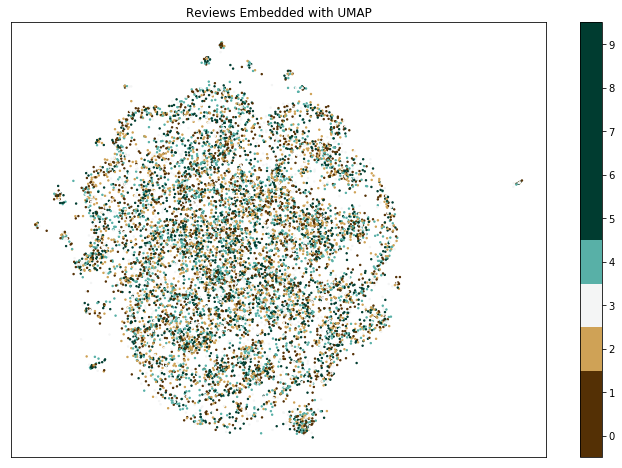

In [317]:
classes = ['0','1','2','3','4','5','6','7','8','9']
fig, ax = plt.subplots(1, figsize=(12, 8)) 

plt.scatter(*train_umap.T, s=2, c = reviews['Rating'],cmap='BrBG', alpha=1) 
plt.setp(ax, xticks=[], yticks=[]) 
cbar = plt.colorbar(boundaries=np.arange(11)-0.5) 
cbar.set_ticks(np.arange(10)) 
cbar.set_ticklabels(classes) 
plt.title('Reviews Embedded with UMAP');

##### t-SNE *not working

In [126]:
# X_embedding = TSNE(n_components=3, perplexity=10, verbose=2, n_iter = 250).fit_transform(dtmTfidf_dense)

In [341]:
# Combine Dimension Reduced Methods into Single df and save to csv
# SparsePCA, LLE and UMAP
drdf = pd.DataFrame()
dr_list = [SparsePCAdf, LLEdf, UMAPdf]

drdf = pd.concat(dr_list, axis=1)

In [342]:
# Save Dimension Reduced Columns as csv for future use
drdf.to_csv("dimensionreduced.csv")

##### Prepare a DataFrame for Train/Test Split
###### combine reviews, dimension reduced and polarity scores

In [363]:
review_ratingdf = pd.read_csv("reviews.csv", usecols=['Rating'])
dimensionreduceddf = pd.read_csv('dimensionreduced.csv').drop(['Unnamed: 0'], axis=1)
polaritydf = pd.read_csv('polarity.csv').drop(['Unnamed: 0'], axis=1)

In [364]:
modelcols = pd.DataFrame()
modelcols_list = [review_ratingdf, dimensionreduceddf, polaritydf]

modelcols = pd.concat(modelcols_list, axis=1)

In [367]:
modelcols.shape
# modelcols.columns

(10000, 32)

#### Divide into Train + Test set

In [381]:
X = modelcols.iloc[:,1:]
y = modelcols.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,
                                                     random_state=3)

###### XGboost

In [512]:
n_estimators = [100, 500, 1000]
learning_rate = [.01, .01] # 0.0001 < learning rate < 0.1 is optimal
subsample = [0.5] 
max_depth = [5, 7] 

param_grid = dict(n_estimators=n_estimators,
                  learning_rate=learning_rate,
                  subsample = subsample,
                  max_depth = max_depth) 

model = XGBClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search_XGB = GridSearchCV(model, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1)

grid_result_XGB = grid_search_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 147.1min finished


In [514]:
print("Best: %f using %s" % (grid_result_XGB.best_score_, grid_result_XGB.best_params_)) # learn: 0.1, depth:6, n_estim: 100, subsamp: 0.6

Best: -1.384625 using {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


In [515]:
y_pred_XGboost = grid_result_XGB.predict(X_test)

In [516]:
print("XGboost accuracy score:", accuracy_score(y_pred_XGboost, y_test)) # 0.393 #0.372

XGboost accuracy score: 0.38


##### Gradient Boosting

In [536]:
learning_rates = [0.01] #.01
n_estimators = [1000] #300 # 500 #1000
subsample = [0.4] #.6 #0.4

param_grid = dict(n_estimators=n_estimators,
                  learning_rate=learning_rate,
                  subsample = subsample)

model = GradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search_GB = GridSearchCV(model, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1)

grid_result_GradientBoost = grid_search_GB.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.5min finished


In [537]:
print("Best: %f using %s" % (grid_result_GradientBoost.best_score_, grid_result_GradientBoost.best_params_))

Best: -1.389411 using {'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.4}


In [538]:
y_pred_GradientBoost = grid_result_GradientBoost.predict(X_test)

In [539]:
print("Gradient Boost accuracy score:", accuracy_score(y_pred_GradientBoost, y_test)) # 0.381 #.371

Gradient Boost accuracy score: 0.389


##### Random Forest

In [482]:
n_estimators = [1000, 2000, 3000]

param_grid = dict(n_estimators=n_estimators)

model = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search_RF = GridSearchCV(model, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1)

grid_result_RF = grid_search_RF.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.1min finished


In [986]:
print("Best: %f using %s" % (grid_result_RF.best_score_, grid_result_RF.best_params_))

Best: -1.396028 using {'n_estimators': 3000}


In [987]:
y_pred_RF = grid_result_RF.predict(X_test)

In [988]:
print("Random Forest accuracy score:", accuracy_score(y_pred_RF, y_test)) # 0.372

Random Forest accuracy score: 0.372


#### Clustering

In [1031]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)

In [839]:
clusteringcols = pd.DataFrame()
clustering_list = [dimensionreduceddf] #, polaritydf

clusteringcols = pd.concat(clustering_list, axis=1)

##### K Means

In [1010]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_umap)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1011]:
labels_k = kmeans.predict(train_umap)
centroids = kmeans.cluster_centers_

In [1012]:
# Cluster crosstab for kmeans
pd.crosstab(reviews.Rating, labels_k)

col_0,0,1,2,3,4
Rating,,,,,
1,353,428,333,460,357
2,342,435,386,489,367
3,341,456,393,511,363
4,298,464,368,474,363
5,338,463,385,468,365


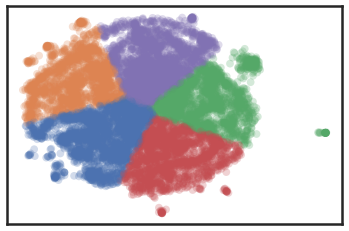

In [1033]:
plot_clusters(train_umap, KMeans, (), {'n_clusters':5})

##### DBscan

In [1014]:
db = DBSCAN(eps=0.3, min_samples=100).fit(train_umap) #clusteringcols
labels_db = db.labels_

In [1015]:
pd.crosstab(reviews.Rating, labels_db)

col_0,-1,0,1,2,3,4
Rating,,,,,,
1,279,1527,30,22,43,30
2,243,1647,36,10,38,45
3,265,1666,39,19,35,40
4,270,1575,42,20,32,28
5,276,1622,36,16,36,33


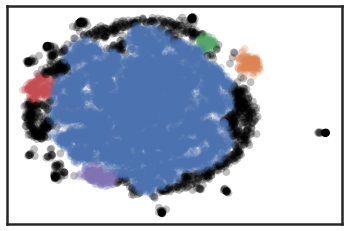

In [1016]:
plot_clusters(train_umap, DBSCAN, (), {'eps':0.3, 'min_samples':100})

##### HDBscan

In [1018]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 10)
clusterer.fit(train_umap)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
        prediction_data=False)

In [1019]:
labels_hdb = clusterer.labels_
labels_hdb2 = clusterer.probabilities_

In [1020]:
pd.crosstab(reviews.Rating, labels_hdb)

col_0,-1,0,1,2,3,4,5,6,7
Rating,,,,,,,,,
1,5,8,32,4,5,11,2,1853,11
2,9,2,36,4,3,4,1,1948,12
3,7,8,40,4,2,7,6,1982,8
4,4,5,43,1,5,12,8,1881,8
5,4,4,39,1,5,11,4,1950,1


In [940]:
# plt.scatter(labels_hdb2, reviews.Rating, color='b', **plot_kwds)

In [941]:
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

plot_kwds={'alpha':0.25, 's':60, 'linewidths':0}
palette = sns.color_palette('deep', 12)

In [942]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10).fit(train_umap)

In [919]:
# UMAPdf.head()

In [989]:
# pal = sns.color_palette('deep', 8)
# colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
#                                                             clusterer.probabilities_)]
# plt.scatter(train_umap.T[0], train_umap.T[1], c=reviews.Rating, **plot_kwds);

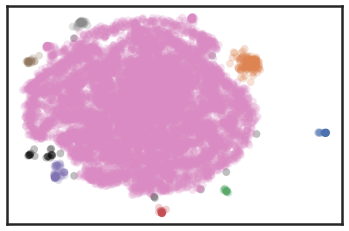

In [1035]:
plot_clusters(train_umap, hdbscan.HDBSCAN, (), {'min_cluster_size':10})

#### other

In [259]:
X_embedding = TSNE(n_components=2, perplexity=40, verbose=2, n_iter = 500).fit_transform(dtmTfidfDF)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.460s...
[t-SNE] Computed neighbors for 10000 samples in 443.725s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.413536
[t-SNE] Computed conditional probabilities in 0.393s
[t-SNE] Iteration 50: error = 133.7769775, gradient norm = 0.1803426 (50 iterations in 6.422s)
[t-SNE

In [261]:
tsne1= pd.DataFrame(X_embedding, columns = ['A', 'B'])
# tsne1["y"] = y

# original= pd.DataFrame(X_scaled)
# original["y"] = y

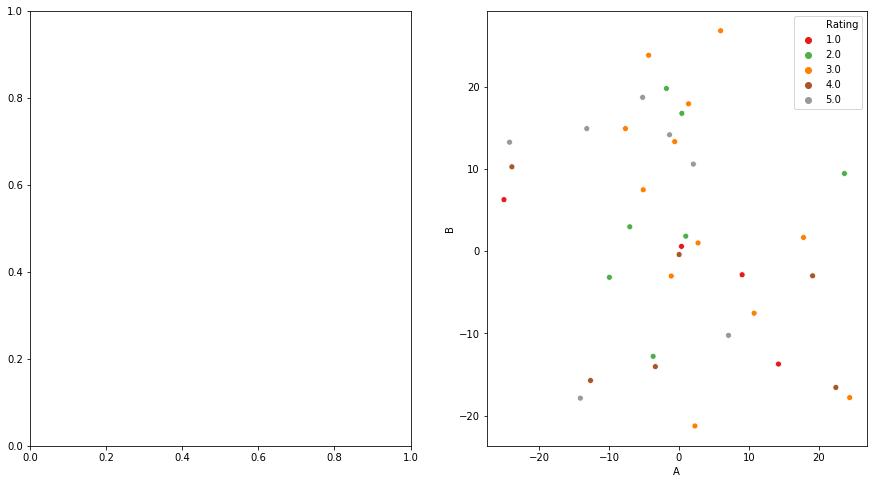

In [290]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,8))
# sns.regplot(x=idx, y=df['x'], ax=ax1)
# sns.regplot(x=idx, y=df['y'], ax=ax2)

# sns.scatterplot(x=original.iloc[:,1], y=original.iloc[:,2], hue="y",data=original, palette="Set1", legend='full', ax=ax1)

# sns.scatterplot(x=pca.iloc[:,0], y=pca.iloc[:,1], hue="y",data=pca, palette="Set1", legend='full', ax=ax2)

sns.scatterplot(x="A", y="B", hue=reviews['Rating'],data=tsne1, palette="Set1", legend='full', ax=ax2)